Berikut merupakan link untuk repository github asessment 2 : https://github.com/ninenovitantri/H8_58/tree/master/Asessment%202

# NYC Property Sales Introduction

# 1. Data Preparation

Load library yang akan dipakai

Download dataset NYC property dari kaggle

In [55]:
import math
import statistics

import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# for latex equations
from IPython.display import Math, Latex

from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli

#seaborn configuration
sns.set(color_codes=True)
sns.set(rc={"figure.figsize": (5, 5)})

In [56]:
# Load the dataset 

df_NYC = pd.read_csv("C:/Users/Nine/Documents/hacktiv8/Asessment 2/nyc-rolling-sales.csv")

print("Data read into pandas dataframe!")

Data read into pandas dataframe!


In [57]:
# View first 5 row

df_NYC.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [58]:
# View last 5 rows

df_NYC.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [59]:
# View data dimension

df_NYC.shape

(84548, 22)

In [60]:
# Drop Unnamed:0 and EASE-MENT column karena kosong dan tidak terpakai untuk saat ini

df_NYC = df_NYC.drop(["Unnamed: 0", "EASE-MENT"], axis=1)

df_NYC.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [61]:
# View features data type

df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [62]:
# Pertama, kita cek kolom mana yang seharusnya categorical

print("Column name")
for col in df_NYC.columns:
    if df_NYC[col].dtype=="object":
        print(col, df_NYC[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [63]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# Categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE", "BOROUGH"]
for col in numer: # coerce for missing values
    df_NYC[col] = pd.to_numeric(df_NYC[col], errors='coerce')

categ = ["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE"]
for col in categ:
    df_NYC[col] = df_NYC[col].astype("category")

df_NYC["SALE DATE"] = pd.to_datetime(df_NYC["SALE DATE"], errors="coerce")

In [64]:
df_NYC.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [65]:
# Kita cek apakah ada missing value

missing = df_NYC.isnull().sum()/len(df_NYC)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_NYC.isnull().sum()[df_NYC.isnull().sum()>1000])], index=["Percent missing","How many missing"]))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
Percent missing          31.049818          32.658372     17.22217
How many missing      26252.000000       27612.000000  14561.00000


Sekitar 30% dari LAND SF dan GROSS SF missing. Selain itu, sekitar 17% dari SALE PRICE juga missing.

Kita dapat mengisi nilai yang missing itu dari satu kolom ke kolom yang lain yang akan membantu kita untuk mereduce nilai yang missing.

In [66]:
print(df_NYC[(df_NYC["LAND SQUARE FEET"].isnull()) & (df_NYC["GROSS SQUARE FEET"].notnull())].shape)
print(df_NYC[(df_NYC["LAND SQUARE FEET"].notnull()) & (df_NYC["GROSS SQUARE FEET"].isnull())].shape)

(6, 20)
(1366, 20)


In [67]:
df_NYC["LAND SQUARE FEET"] = df_NYC["LAND SQUARE FEET"].mask((df_NYC["LAND SQUARE FEET"].isnull()) & (df_NYC["GROSS SQUARE FEET"].notnull()), df_NYC["GROSS SQUARE FEET"])
df_NYC["GROSS SQUARE FEET"] = df_NYC["GROSS SQUARE FEET"].mask((df_NYC["LAND SQUARE FEET"].notnull()) & (df_NYC["GROSS SQUARE FEET"].isnull()), df_NYC["LAND SQUARE FEET"])

In [68]:
#  Cek apakah ada duplikasi data atau tidak

print(sum(df_NYC.duplicated()))

df_NYC[df_NYC.duplicated(keep=False)].sort_values(["NEIGHBORHOOD", "ADDRESS"]).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


Dataframe di atas mempunyai duplikasi baris sebanyak 765 termasuk original rowsnya.

In [69]:
# Kita akan drop duplikat baris dari dataset

df_NYC.drop_duplicates(inplace=True)

print(sum(df_NYC.duplicated()))

0


# 2. Exploratory Data Analysis

In [70]:
# Kita cek lagi datasetnya

df_NYC.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [71]:
# View data dimension

df_NYC.shape

(83783, 20)

In [72]:
# View non-duplicate content of RESIDENTIAL UNITS & COMMERCIAL UNITS

print(df_NYC["RESIDENTIAL UNITS"].value_counts())
print(df_NYC["COMMERCIAL UNITS"].value_counts())

1      34465
0      24546
2      15918
3       4566
4       1334
       ...  
148        1
680        1
296        1
232        1
127        1
Name: RESIDENTIAL UNITS, Length: 176, dtype: int64
0       78777
1        3520
2         771
3         249
4         131
5          73
6          69
7          28
8          23
9          20
10         15
12         12
15         11
11         10
14          6
17          6
13          4
20          4
35          4
254         3
22          3
19          3
42          3
18          3
422         2
126         2
25          2
16          2
184         1
56          1
59          1
55          1
436         1
52          1
51          1
49          1
172         1
62          1
38          1
23          1
34          1
32          1
31          1
30          1
28          1
91          1
27          1
26          1
24          1
21          1
2261        1
147         1
73          1
67          1
318         1
Name: COMMERCIAL UNITS, dtype: int64

In [73]:
# View COMMERCIAL UNITS simple descriptive statistics

df_NYC[df_NYC["COMMERCIAL UNITS"]!=0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,4.954000e+03,4.954000e+03,5006.000000,3.978000e+03
mean,2.920296,3756.993208,72.658610,10898.462245,6.850579,3.074111,9.914503,1.149824e+04,2.010289e+04,1927.491011,5.989329e+06
std,1.118119,3191.143055,225.476721,674.801858,55.199043,34.963476,65.703340,1.044423e+05,1.098984e+05,142.397476,4.561011e+07
min,1.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1161.000000,11.000000,10456.000000,0.000000,1.000000,1.000000,1.929250e+03,2.566500e+03,1920.000000,0.000000e+00
50%,3.000000,2803.000000,32.000000,11211.000000,1.000000,1.000000,3.000000,2.514000e+03,4.006000e+03,1931.000000,7.500000e+05
75%,4.000000,5574.000000,52.000000,11234.750000,2.000000,2.000000,5.000000,6.000000e+03,8.798500e+03,1950.000000,2.550000e+06
max,5.000000,16230.000000,8009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

1. Year column has a year with 0
2. Other columns also have outliers which needs further investigation
3. Most sales prices less than 10000 can be treated as gift or transfer fees
4. Commercial units are sold in 5,006 boroughs with max units sold 2,261 in 1 borough

In [74]:
# View RESIDENTIAL UNITS simple descriptive statistics

df_NYC[df_NYC["RESIDENTIAL UNITS"]!=0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,4.823100e+04,4.823100e+04,59237.000000,4.875200e+04
mean,3.188767,4610.712342,414.339788,10903.841552,2.828705,0.069433,2.897277,3.156000e+03,3.287738e+03,1837.171987,1.130316e+06
std,1.219989,3686.816317,687.593893,603.316848,19.645674,0.460570,19.832720,2.814200e+04,2.982401e+04,456.570222,4.535920e+06
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,1490.000000,26.000000,10312.000000,1.000000,0.000000,1.000000,1.850000e+03,1.248000e+03,1920.000000,2.900000e+05
50%,3.000000,3937.000000,56.000000,11214.000000,1.000000,0.000000,1.000000,2.422000e+03,1.800000e+03,1935.000000,5.800000e+05
75%,4.000000,6713.000000,1009.000000,11360.000000,2.000000,0.000000,2.000000,3.500000e+03,2.600000e+03,1979.000000,9.800000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,25.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,6.200000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

1. Year column has a year with 0
2. On average, 2 units are sold
3. Most sales prices less than 10000 can be treated as gift or transfer fees
4. Residential units are sold in 59,237 boroughs with max units sold 1,844 in 1 borough
5. Other columns also have outliers which needs further investigation.

In [75]:
# Count non-duplicate BOROUGH

print(df_NYC["BOROUGH"].value_counts())

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64


# Mean

In [76]:
# Average properties price in the data

df_NYC["SALE PRICE"].mean()

1280703.0003016938

In [77]:
# Average properties price in each borough
df_average1 = df_NYC.groupby(["BOROUGH"]) \
      .agg(mean_saleprice = pd.NamedAgg("SALE PRICE", np.mean)) \
      .reset_index()

In [78]:
df_average1

,BOROUGH,mean_saleprice
0,1,3.344642e+06
1,2,5.946771e+05
2,3,8.410834e+05
3,4,7.388827e+05
4,5,5.436113e+05


Let us try to understand the columns

1. Among 5 boroughs, Borough 5 has the smallest average sale price
2. Borough 1 has higher average sale price than the average of all borough

# Median

In [79]:
# Median of properties price in the data

df_NYC["SALE PRICE"].median()

533000.0

In [80]:
# Average properties price in each building class category

df_average2 = df_NYC.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(median_saleprice = pd.NamedAgg("SALE PRICE", np.median)) \
      .reset_index()

df_average2.sort_values(by="median_saleprice")

,BUILDING CLASS CATEGORY,median_saleprice
46,49 CONDO WAREHOUSES/FACTORY/INDUS,0.0
45,48 CONDO TERRACES/GARDENS/CABANAS,0.0
38,41 TAX CLASS 4 - OTHER,0.0
16,16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,0.0
41,44 CONDO PARKING,0.0
18,18 TAX CLASS 3 - UNTILITY PROPERTIES,0.0
44,47 CONDO NON-BUSINESS STORAGE,0.0
5,06 TAX CLASS 1 - OTHER,0.0
36,39 TRANSPORTATION FACILITIES,110000.0
4,05 TAX CLASS 1 VACANT LAND,112007.0


Let us try to understand the columns.

1. 14 category of building have lower median sale price than the median of all data
2. Category of "LUXURY HOTELS" and "THEATRES" have significant median price among other category (>10,000,000)
3. Median of properties sale price is 533,000

# Modus

In [81]:
# Modus of borough in all data

df_NYC["BOROUGH"].mode()

0    4
dtype: int64

In [82]:
# Modus of borough in each BUILDING CLASS CATEGORY

df_modus = df_NYC.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(modus_borough = pd.NamedAgg("BOROUGH", scipy.stats.mode)) \
      .reset_index()

df_modus.sort_values(by="modus_borough")

,BUILDING CLASS CATEGORY,modus_borough
37,40 SELECTED GOVERNMENTAL FACILITIES,"([1], [1])"
10,11 SPECIAL CONDO BILLING LOTS,"([1], [1])"
31,34 THEATRES,"([1], [8])"
33,36 OUTDOOR RECREATIONAL FACILITIES,"([1], [9])"
22,25 LUXURY HOTELS,"([1], [11])"
25,28 COMMERCIAL CONDOS,"([1], [13])"
21,23 LOFT BUILDINGS,"([1], [36])"
23,26 OTHER HOTELS,"([1], [57])"
43,46 CONDO STORE BUILDINGS,"([1], [80])"
19,21 OFFICE BUILDINGS,"([1], [106])"


Mari kita coba ambil kesimpulan

1. Modus dari semua Borough adalah Borough 4
2. Setiap BUILDING CLASS CATEGORY, hanya 5 kategori yang mempunyai Borough 4 sebagai modus
3. Sebagian besar modus Borough di BUILDING CLASS CATEGORY adalah Borough 3

# Range 

In [83]:
# Exclude null SALE PRICE

df_range = df_NYC.loc[df_NYC["SALE PRICE"].notnull(), :]

df_range

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [84]:
df_range1 = df_range.loc[df_range["SALE PRICE"]!=0, :]

df_range1

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [85]:
# Range of properties price in each borough

df_rangeprice = df_range1.groupby(["BOROUGH"]) \
      .agg(range_saleprice = pd.NamedAgg("SALE PRICE", np.ptp)) \
      .reset_index()

df_rangeprice.sort_values(by="range_saleprice")

,BOROUGH,range_saleprice
1,2,1.100000e+08
4,5,1.220000e+08
3,4,2.575000e+08
2,3,3.450000e+08
0,1,2.210000e+09


Mari kita coba ambil kesimpulan

1. Borough 1 mempunyai range sale price tertinggi jika dibandingkan dengan Borough yang lain

# Variance

In [86]:
# Variance of properties price in each borough

df_variance = df_range1.groupby(["BOROUGH"]) \
      .agg(variance_saleprice = pd.NamedAgg("SALE PRICE", np.var)) \
      .reset_index()

df_variance.sort_values(by="variance_saleprice")

,BOROUGH,variance_saleprice
4,5,3.631100e+12
1,2,1.039236e+13
3,4,1.041624e+13
2,3,2.322026e+13
0,1,5.827628e+14


Mari kita coba ambil kesimpulan

1. Borough 1 mempunyai variance sale price tertinggi jika dibandingkan dengan Borough yang lain

# Standard Deviation

In [87]:
# Standard deviation of properties price in each building class category

df_SD = df_range1.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(standarddev_saleprice = pd.NamedAgg("SALE PRICE", np.std)) \
      .reset_index()

df_SD.sort_values(by="standarddev_saleprice")

,BUILDING CLASS CATEGORY,standarddev_saleprice
46,49 CONDO WAREHOUSES/FACTORY/INDUS,5.734518e+03
44,47 CONDO NON-BUSINESS STORAGE,6.876000e+04
45,48 CONDO TERRACES/GARDENS/CABANAS,4.832778e+05
12,12 CONDOS - WALKUP APARTMENTS,5.077361e+05
3,04 TAX CLASS 1 CONDOS,5.842417e+05
5,06 TAX CLASS 1 - OTHER,6.348076e+05
1,02 TWO FAMILY DWELLINGS,8.829285e+05
0,01 ONE FAMILY DWELLINGS,9.801897e+05
2,03 THREE FAMILY DWELLINGS,1.033324e+06
8,09 COOPS - WALKUP APARTMENTS,1.066299e+06


Mari kita coba ambil kesimpulan

1. Office building mempunyai standard deviation sale price tertinggi jika dibandingkan dengan BUILDING CLASS CATEGORY yang lain

# Probability Distribution

In [88]:
# Create dataset untuk spesifik range SALE PRICE

df_temp = df_range1[df_range1["SALE PRICE"] < 1E6]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.015, 'Distribution of Properties Sale Price')

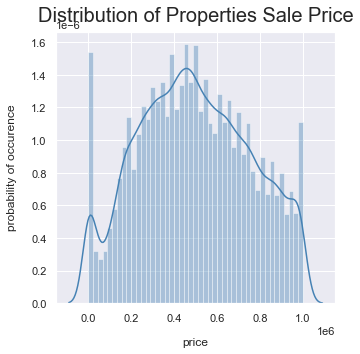

In [89]:
sns.distplot(df_temp["SALE PRICE"],
            color="steelblue")
plt.xlabel("price", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Properties Sale Price", y=1.015, fontsize=20)

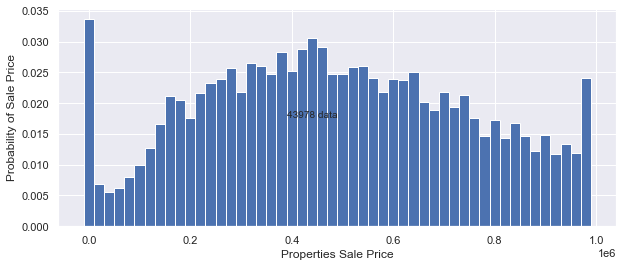

In [93]:
%matplotlib inline
H, edges = np.histogram(df_temp["SALE PRICE"], bins=50)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.5, 0.5, "%g data" % len(df_temp),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Properties Sale Price")
ax.set_ylabel("Probability of Sale Price")
ax.minorticks_on()
plt.show()

Mari kita coba ambil kesimpulan

1. Probability Distribution property sale price kurang dari 1E6 dalam distribusi normal dengan outlier di tail kanan dan kiri

# Confidence Interval

In [94]:
# View the STD and mean for sale price in each borough

df_temp.groupby("BOROUGH").aggregate({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                        
                  mean            std     size
BOROUGH                                       
1        608957.788429  244624.560017   6551.0
2        372351.929773  212685.762518   4756.0
3        539497.001614  277662.045591  10532.0
4        474419.206878  254363.648829  16314.0
5        458765.481545  206930.535625   5825.0

In [95]:
# Karena Borough 4 mempunyai mean tertinggi,kita akan lakukan perhitungan untuk Borough 4

mean_bor4 = 7.399086e+05
std_bor4 = 3.233884e+06	
n_bor4 = 18441
z = 1.96

stderr_mean_bor4 = std_bor4  / np.sqrt(n_bor4 )
print("Standard error mean of sale price in Borough 4:", stderr_mean_bor4)

Standard error mean of sale price in Borough 4: 23813.99201717212


In [96]:
def CI(estimate, stderr, z_score=1.96):
    return (
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )

In [97]:
lower_ci, upper_ci = CI(mean_bor4, stderr_mean_bor4)
print(f"CI for sale price in Borough 4: [{lower_ci:.3f}, {upper_ci:.3f}]",)

CI for sale price in Borough 4: [693233.176, 786584.024]


Mari kita coba ambil kesimpulan

1. Berdasarkan hasi dari Confidence Interval, dapat diambil kesimpulan rata-rata sebenarnya dari sale price di Borough 4, akan turun dengan angka antara 693233.176 dan 786584.024

# Hypothesis Testing

In [98]:
bor3 = df_range1[df_range1["BOROUGH"] == 3]
bor4 = df_range1[df_range1["BOROUGH"] == 4]

# num of observation
num_bor3 = len(bor3)
num_bor4 = len(bor4)

# std
std_bor3 = bor3["SALE PRICE"].std()
std_bor4 = bor4["SALE PRICE"].std()

# mean
mu_bor3 = bor3["SALE PRICE"].mean()
mu_bor4 = bor4["SALE PRICE"].mean()

In [99]:
sm.stats.ztest(bor3["SALE PRICE"].dropna(), bor4["SALE PRICE"].dropna(), alternative="two-sided")

(12.347123681273965, 5.048428168806935e-35)

Mari kita coba ambil kesimpulan

1. Kita dapat menolak hypotesis yang menyatakan bahwa rata-rata sale price di Borough 3 dan 4 sama, berdasarkan p-value sangat kecil